In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_men)

% of women who survived: 0.18890814558058924


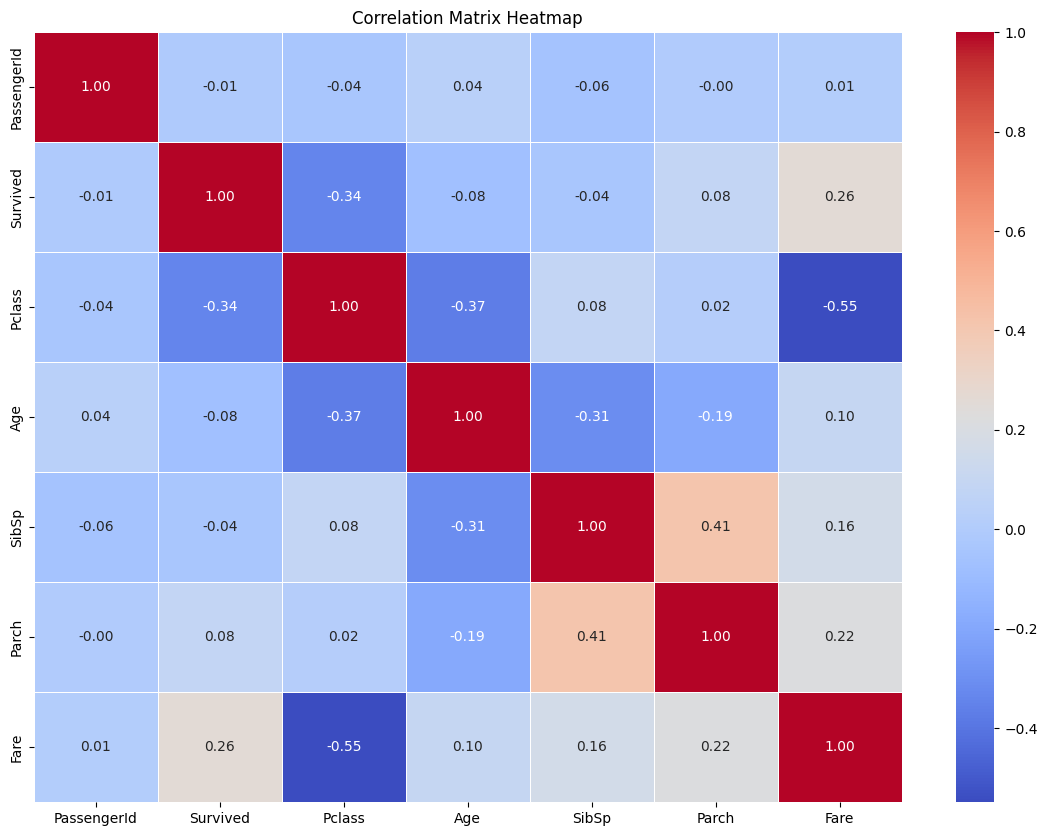

In [6]:
# Compute correlation matrix
correlation_matrix = train_data.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ['Sex', 'Pclass', 'Embarked', 'Parch'] ##Cannot use fare because of missing value in test data that cannot be manipulated
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [8]:
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
rf_model.fit(X,y)

# Evaluate model
y_pred_rf = rf_model.predict(X)
print("Random Forest Accuracy:", accuracy_score(y, y_pred_rf))
print(classification_report(y, y_pred_rf))

Random Forest Accuracy: 0.8204264870931538
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       549
           1       0.89      0.61      0.72       342

    accuracy                           0.82       891
   macro avg       0.84      0.78      0.79       891
weighted avg       0.83      0.82      0.81       891



In [9]:
# Standardize only for Logistic Regression (not for RandomForest)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [10]:
# Train logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X, y)

LogisticRegression()

In [11]:
# Evaluate model
y_pred_log_reg = log_reg_model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred_log_reg))
print(classification_report(y, y_pred_log_reg))

Accuracy: 0.7856341189674523
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       549
           1       0.72      0.72      0.72       342

    accuracy                           0.79       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891



In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)


print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.8114619295712762


In [13]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X, y)
y_pred_svm = svm.predict(X)
print("Accuracy:", accuracy_score(y, y_pred_svm))
print(classification_report(y, y_pred_svm))

Accuracy: 0.7867564534231201
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



In [14]:
# Random Forrest had the highest accuracy score so we will submit that one
predictions = rf_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
